In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
data=pd.read_csv("DT.csv")

In [3]:
data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,facebook,computer programmer,bachelors,1
6,facebook,computer programmer,masters,1
7,facebook,computer programmer,bachelors,1
8,facebook,computer programmer,bachelors,1
9,facebook,business manager,masters,1


In [4]:
encode=LabelEncoder()

In [5]:
data['company']=encode.fit_transform(data.company)

In [6]:
data['job']=encode.fit_transform(data.job)

In [7]:
data['degree']=encode.fit_transform(data.degree)

In [8]:
data

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,1,1,0,1
6,1,1,1,1
7,1,1,0,1
8,1,1,0,1
9,1,0,1,1


In [9]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [11]:
classifier=DecisionTreeClassifier(criterion = "entropy")

In [12]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
pred_y=classifier.predict(x_test)

In [14]:
pred_y

array([1, 1, 1, 1], dtype=int64)

In [15]:
y_test

1    0
6    1
8    1
9    1
Name: salary_more_then_100k, dtype: int64

In [16]:
accuracy_score(y_test,pred_y)

0.75

In [17]:
confusion_matrix(y_test,pred_y)

array([[0, 1],
       [0, 3]], dtype=int64)

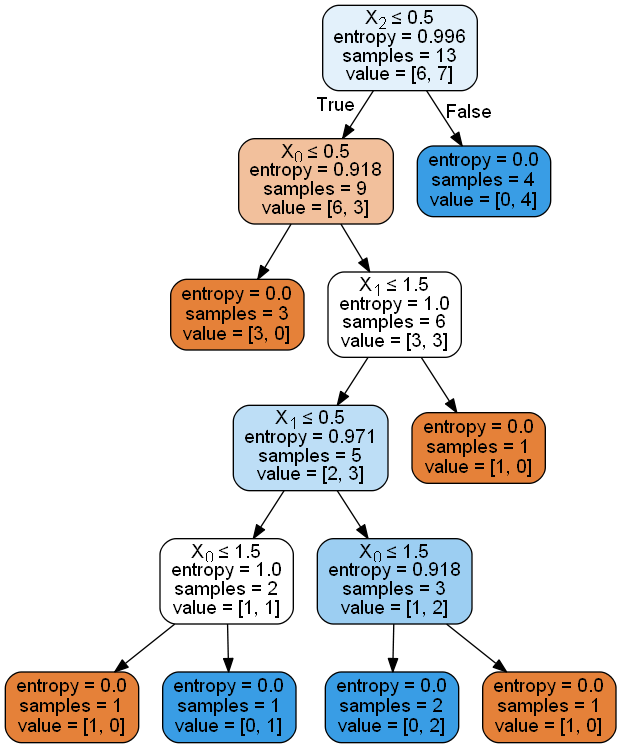

In [19]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT.png')
Image(graph.create_png())